전체 상권 glob를 사용해서해당 패턴 만족하는 모든 파일명을 스트링으로 가져와서 리스트로 가져오기


file_names = glob("/content/drive/MyDrive/colab/datasets/소상공인시장진흥공단_상가(상권)정보_*_202403.csv")


후 저장

total_info

## 데이터 불러오기

In [1]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/colab/제목없는 폴더/total_info.csv', encoding='utf-8')
df.head()

<ipython-input-1-22d3b493e87c>:3: DtypeWarning: Columns (2,35) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/drive/MyDrive/colab/제목없는 폴더/total_info.csv', encoding='utf-8')


,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
0,MA0101202210A0084547,금강산노래광장,NaN,I2,음식,I211,주점,I21101,일반 유흥 주점,I56211,...,4217010300007470000000086,파크장,강원특별자치도 동해시 송정로 11,240806,25789,NaN,지,NaN,129.127525,37.495265
1,MA010120220805430903,엔젤,NaN,I2,음식,I201,한식,I20101,백반/한정식,I55109,...,4277032022103660000008290,NaN,강원특별자치도 정선군 남면 민둥산로 175-13,233837,26148,NaN,NaN,NaN,128.792089,37.259788
2,MA010120220805430941,누베헤어,NaN,S2,수리·개인,S207,이용·미용,S20701,미용실,S96112,...,4211012500100440010000008,춘천파크자이,강원특별자치도 춘천시 스포츠타운길 460,200200,24472,NaN,3,NaN,127.707653,37.867744
3,MA010120220805430946,공차,NaN,I2,음식,I212,비알코올,I21201,카페,I56229,...,4213033023113500001000001,NaN,강원특별자치도 원주시 지정면 신지정로 211,220821,26354,NaN,NaN,NaN,127.872713,37.374189
4,MA010120220805431369,행운쉼터,NaN,I1,숙박,I101,일반 숙박,I10103,펜션,I55104,...,4281032022008200005013654,NaN,강원특별자치도 인제군 북면 금강로 751,252826,24609,NaN,NaN,NaN,128.207086,38.171871


그래프 한국어로 설정

In [3]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 49 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 1s (7,940 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 123620 files and dire

## 필요한 컬럼만 추출

In [3]:
df = df[['상호명','상권업종대분류명','상권업종중분류명','상권업종소분류명','시도명','시군구명','행정동명']]

## 데이터 전처리

In [4]:
df.isnull().sum()

,0
상호명,1
상권업종대분류명,0
상권업종중분류명,0
상권업종소분류명,0
시도명,0
시군구명,0
행정동명,0


In [5]:
df[df.상호명.isnull()]

,상호명,상권업종대분류명,상권업종중분류명,상권업종소분류명,시도명,시군구명,행정동명
1308050,NaN,소매,섬유·의복·신발 소매,신발 소매업,부산광역시,부산진구,부전2동


In [6]:
# 상호명은 중요하지 않은데 업종 종류나 시도 분포를 보기위해 drop대신 0으로 채움
df['상호명'].fillna(0,inplace=True)

<ipython-input-6-48d0b626b26c>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['상호명'].fillna(0,inplace=True)


In [7]:
df.isnull().sum()

,0
상호명,0
상권업종대분류명,0
상권업종중분류명,0
상권업종소분류명,0
시도명,0
시군구명,0
행정동명,0


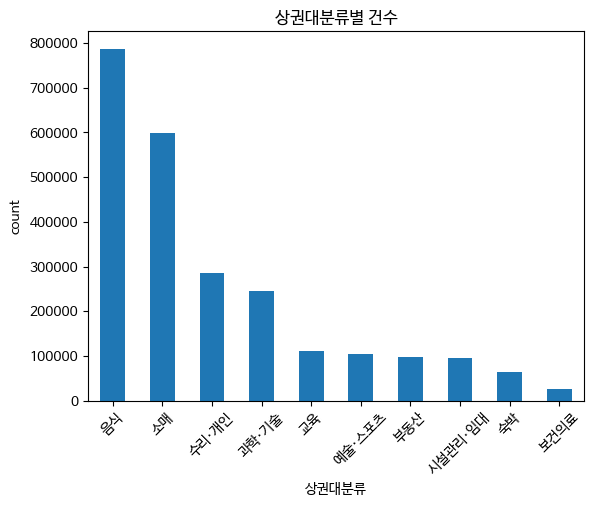

In [8]:
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic')
df_상권대분류 = df.상권업종대분류명.value_counts()

df_상권대분류.plot(kind='bar')
plt.xticks(rotation=45)
plt.title('상권대분류별 건수')
plt.ylabel('count')
plt.xlabel('상권대분류')
plt.show()

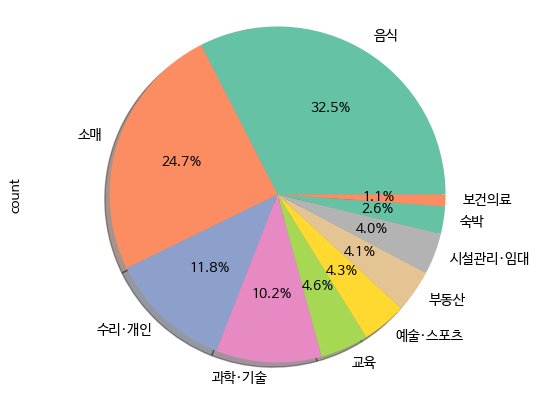

In [9]:
import seaborn as sns
df_상권대분류.plot(kind='pie',shadow=True,autopct='%1.1f%%',colors = sns.color_palette('Set2'))
plt.axis('equal')
plt.show()

## 대분류 비율로 봤을 때 낮은 비율은 제외

- 음식과 소매가 50%의 비율이 넘음

- 10%가 넘는 비율인 수리/개인, 과학/기술까지 포함



In [10]:
filtered_df = df[df.상권업종대분류명.isin(['음식','소매','수리·개인','과학·기술'])]

In [11]:
filtered_df.head()

,상호명,상권업종대분류명,상권업종중분류명,상권업종소분류명,시도명,시군구명,행정동명
0,금강산노래광장,음식,주점,일반 유흥 주점,강원특별자치도,동해시,송정동
1,엔젤,음식,한식,백반/한정식,강원특별자치도,정선군,남면
2,누베헤어,수리·개인,이용·미용,미용실,강원특별자치도,춘천시,강남동
3,공차,음식,비알코올,카페,강원특별자치도,원주시,지정면
5,만월,음식,주점,요리 주점,강원특별자치도,동해시,천곡동


In [16]:
# 시도별 어느 중분류가 많은가
df_중분류 = pd.pivot_table(data = filtered_df, columns = '시도명', index='상권업종중분류명',aggfunc='size')

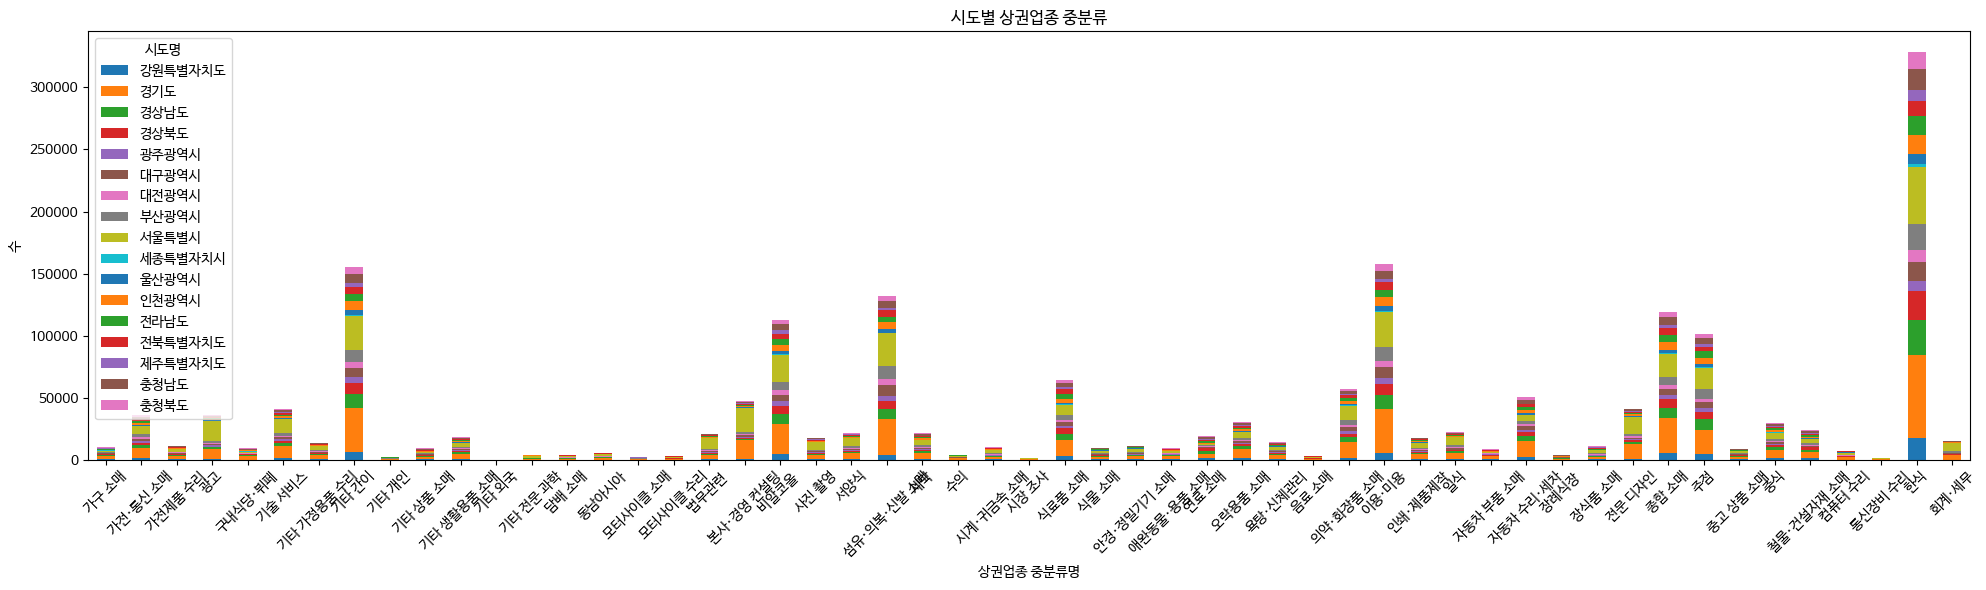

In [28]:
# %matplotlib inline
# plt.figure(figsize=(20,6))
df_중분류.plot(kind='bar', stacked=True, figsize=(20,6))

# 그래프 제목 및 레이블 설정
plt.title('시도별 상권업종 중분류')
plt.xlabel('상권업종 중분류명')
plt.xticks(rotation=45)
plt.ylabel('수')
plt.legend(title='시도명', labels=df_중분류.columns)

# 그래프 보여주기
plt.tight_layout()  # 그래프가 잘 보이도록 레이아웃 조정
plt.show()

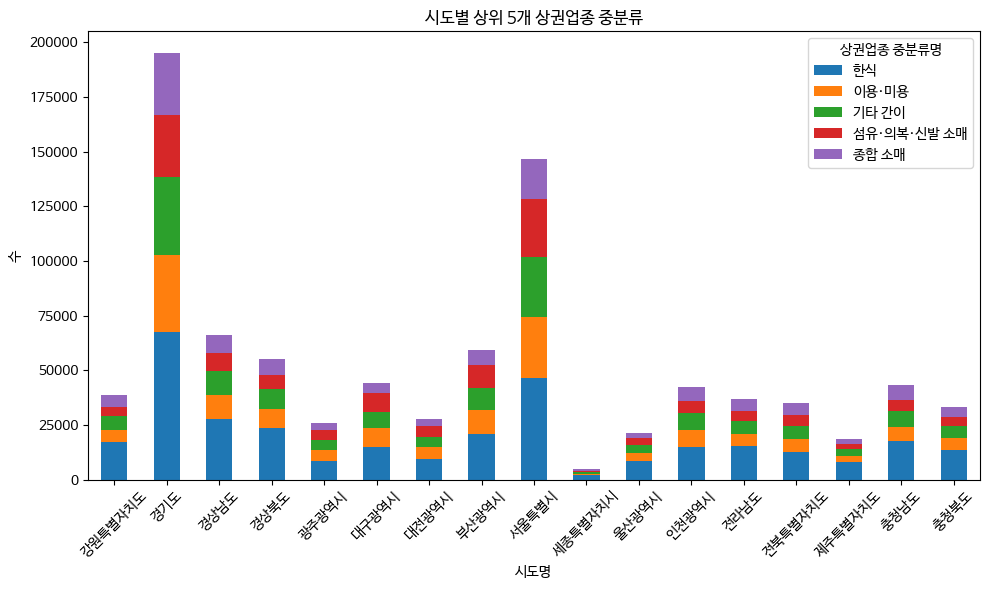

In [30]:
df_중분류1 = pd.pivot_table(data = filtered_df, index = '시도명', columns='상권업종중분류명',aggfunc='size')

# 중분류별 상위 5개의 카테고리 선택 (총합 기준 상위 5개)
top5_categories = df_중분류1.sum().nlargest(5).index

# 상위 5개의 중분류만 필터링
df_top5 = df_중분류1[top5_categories]

# 그래프 그리기 (Stacked Bar Chart)
ax = df_top5.plot(kind='bar', stacked=True, figsize=(10, 6))

# 그래프 제목 및 레이블 설정
ax.set_title('시도별 상위 5개 상권업종 중분류')
ax.set_xlabel('시도명')
ax.set_ylabel('수')
ax.legend(title='상권업종 중분류명')

# X축 눈금 회전
plt.xticks(rotation=45)

# 레이아웃 조정 및 그래프 보여주기
plt.tight_layout()
plt.show()
